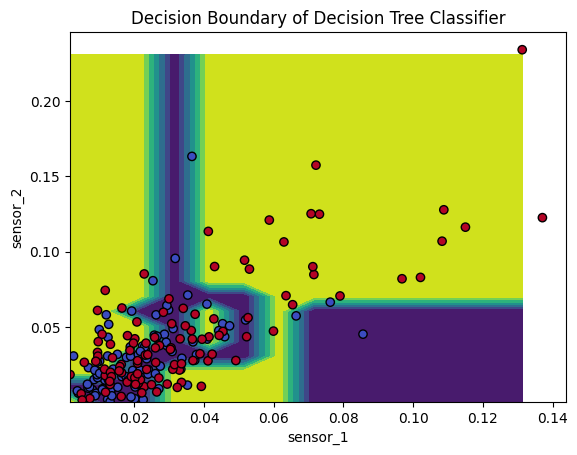

In [1]:

# Preparing Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
import warnings
warnings.filterwarnings('ignore')
# Load the rock mines dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
df = pd.read_csv(url)
column_names = ["sensor_" + str(i) for i in range(1, 61)] + ["target"]
df.columns = column_names
df = df.reset_index()
df = df.rename(columns={"index": "id"})
df['target'] = df['target'].map({'M': 1, 'R': 0})
x_data = df.iloc[:, :60]
x_data = x_data.drop('id', axis=1)
y_data = df['target']


from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_data, y_data)




x_data = x_data.iloc[:, :2]  # We will use only the first two features for simplicity
# Train a decision tree classifier
clf = DecisionTreeClassifier().fit(x_data, y_data)
# Create a mesh grid for plotting
x_min, x_max = x_data.iloc[:, 0].min() , x_data.iloc[:, 0].max()
y_min, y_max = x_data.iloc[:, 1].min() , x_data.iloc[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
# Predict the classification for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the decision boundary
display = DecisionBoundaryDisplay(xx0=xx, xx1=yy, response=Z)
display.plot()
# Plot the training points
plt.scatter(x_data.iloc[:, 0], x_data.iloc[:, 1], c=y_data, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel(x_data.columns[0])
plt.ylabel(x_data.columns[1])
plt.title("Decision Boundary of Decision Tree Classifier")
plt.show()

